In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

# added
import glob
from process_wv import get_images_from_filename_array
import tqdm

In [2]:
#Loading our labels
coords, chips, classes = wv.get_labels("/home/physicsai/sim2real/data/xview/Xview_train.geojson")


100%|██████████| 601937/601937 [00:02<00:00, 237935.04it/s]


In [3]:
# Mini folderpath: 
mini_img_folderpath = '../../data/xview/temp_mini_train/'

# example chip name
chip_name = '2386.tif'

#We only want to coordinates and classes that are within our chip
img_coords = coords[chips==chip_name]
img_classes = classes[chips==chip_name].astype(np.int64)

In [4]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [5]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(img_classes)])

['Small Aircraft', 'Cargo Plane', 'Helicopter', 'Small Car', 'Bus', 'Pickup Truck', 'Utility Truck', 'Truck', 'Cargo Truck', 'Truck w/Box', 'Truck Tractor', 'Trailer', 'Truck w/Flatbed', 'Truck w/Liquid', 'Excavator', 'Building', 'Aircraft Hangar', 'Facility', 'Vehicle Lot', 'Helipad']


In [16]:
img_cargo_planes = img_coords[img_classes==13]

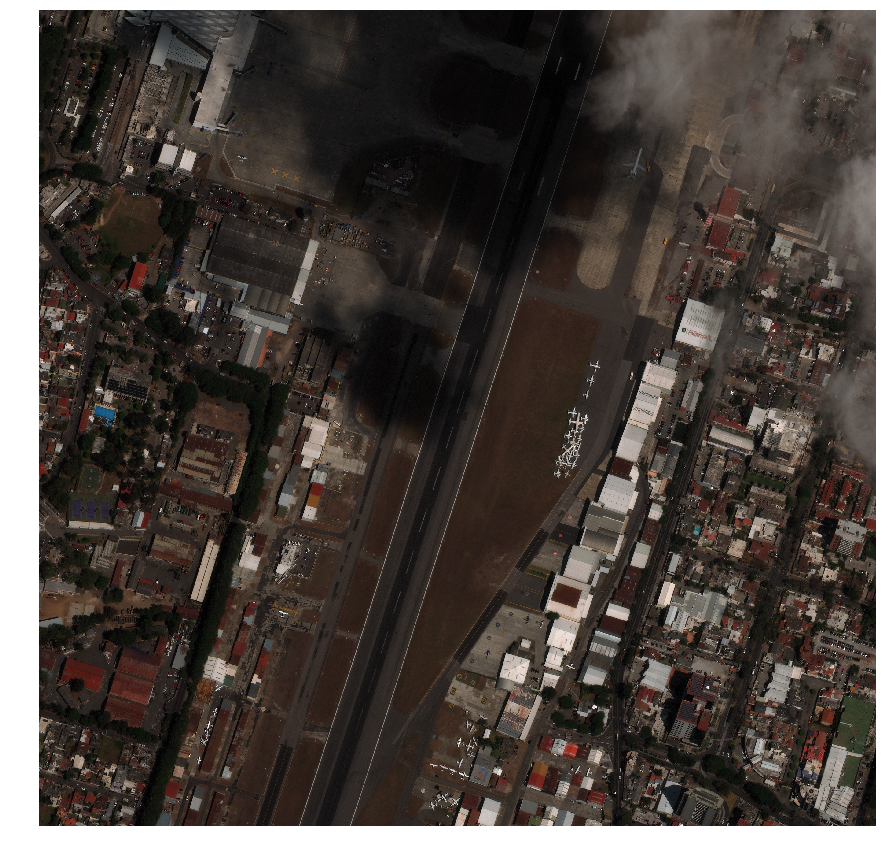

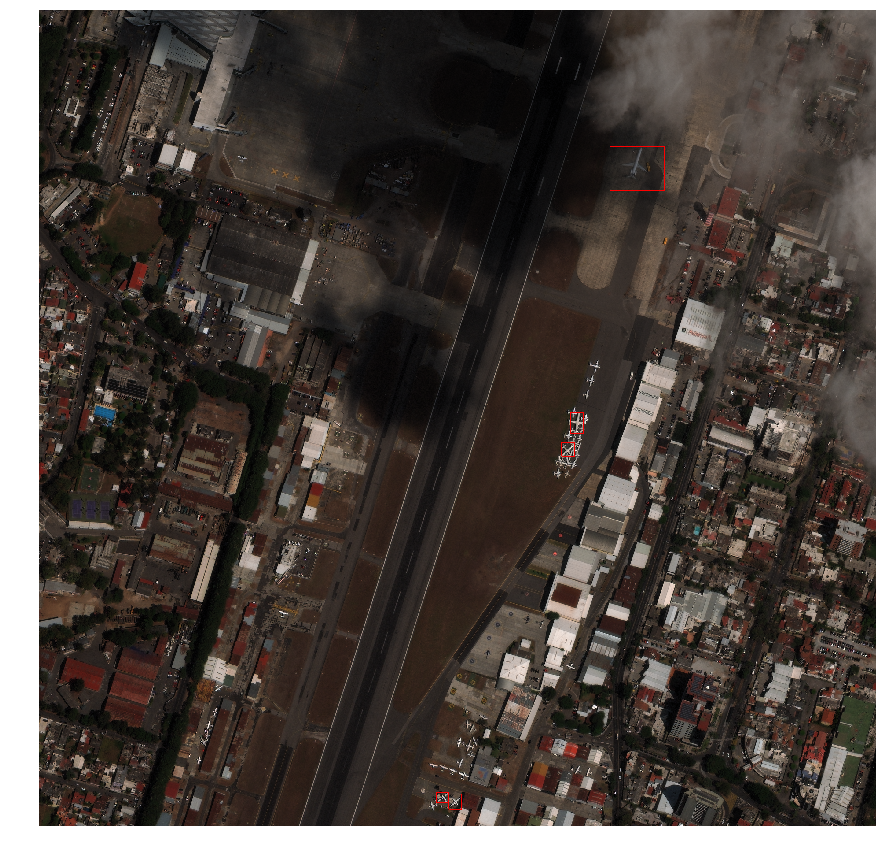

In [17]:
im = wv.get_image("/home/physicsai/sim2real/data/xview/train_images/2386.tif")

plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(im)

#We can visualize the chips with their labels
#ind = np.random.choice(range(c_img.shape[0]))
labelled = aug.draw_bboxes(im, img_cargo_planes)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(labelled)

In [43]:


#get_images_from_filename_array(coords=coords, chips=chips, classes=classes,folder_names=mini_img_folderpath, res=(256,256))

filenames = glob.glob(mini_img_folderpath + "*.tif")

print(filenames)
print(type(filenames))

['../../data/xview/temp_mini_train/8.tif', '../../data/xview/temp_mini_train/88.tif', '../../data/xview/temp_mini_train/86.tif', '../../data/xview/temp_mini_train/80.tif', '../../data/xview/temp_mini_train/5.tif']
<class 'list'>


In [46]:
airplane_idxs = [11,12,13]

for fname in tqdm.tqdm(filenames):
    name = fname.split("/")[-1]
    print(name)

    img_classes = classes[chips==name].astype(np.int64)
    print(img_classes)

100%|██████████| 5/5 [00:00<00:00, 25.84it/s]8.tif
[73 73 18 18 18 21 73 73 73 73 83 19 73 73 73 71 86 86 21 60 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 27 18 18 18 18 18 18 18 18 18 18 18 18 21
 18 18 18 18 18 18 18 18 21 18 18 18]
88.tif
[73 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 13 73 73 73 73 73 25
 23 23 23 23 23 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73 73
 73 73 73 73 73 73 73 73 73 73 18 18 73 73 18 18 73 18 83 18 18 18 18 73
 73 73 73 24 24 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 17 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 73 73 25 24 25 25 25 25 73 27 27 23 23
 23 23 73 73 73 73 73 73 23 

In [38]:
classes

array([13, 73, 13, 13, 13, 13, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 23, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 83, 83, 83, 83, 83, 83, 83, 73, 73, 18, 84, 73, 19,
       19, 19, 19, 18, 18, 18, 18, 18, 19, 17, 17, 19, 53, 53, 63, 77, 23,
       18, 73, 93, 93, 63])